In [1]:
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
leg = np.array([
    [0, 0],
    [0, -1],
    [0, -2],
    [1, -2],
    [1, -3],
    [0, -3]
])

In [3]:
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))

In [4]:
leg2 = (np.matmul(leg, R) / np.sqrt(2)) * 2 # for future int coordinates

In [5]:
def vec2graph(vec):
    G = nx.Graph()
    for i in range(len(vec)):
        if i == 0:
            continue
        e = (tuple(map(int, vec[i - 1].round())), tuple(map(int, vec[i].round())))
        G.add_edge(*e)
    return G

In [6]:
G = vec2graph(leg)
G.add_edge((4,5), (0,-1))
G.add_edge((0,-1), (4,8))
G.add_edge((4,5), (4,6))
list(nx.dfs_edges(G, source=(0,0)))

[((0, 0), (0, -1)),
 ((0, -1), (0, -2)),
 ((0, -2), (1, -2)),
 ((1, -2), (1, -3)),
 ((1, -3), (0, -3)),
 ((0, -1), (4, 5)),
 ((4, 5), (4, 6)),
 ((0, -1), (4, 8))]

In [7]:
def graph_to_chains(G):
    start = list(G.nodes)[0]
    chains = []
    current_chain = []
    prev_node = None
    for n1, n2 in nx.dfs_edges(G, source=(0,0)):
        if prev_node is None or prev_node == n1:
            current_chain.append(n1)
            
        elif len(current_chain):
            current_chain.append(prev_node)
            chains.append(current_chain)
            current_chain = [n1]
            
        prev_node = n2

    if len(current_chain):
        if prev_node is not None:
            current_chain.append(prev_node)
        
        chains.append(current_chain)
    
    return chains

In [8]:
def show_pat(G, lw=10, wh=[10,10], color='white'):
    chains = graph_to_chains(G)
    plt.rcParams['figure.figsize'] = wh
    for chain in chains:
        xs = [n[0] for n in chain]
        ys = [n[1] for n in chain]
        plt.plot(xs, ys, lw=lw, color=color, solid_joinstyle='miter')
    
    plt.gca().set_facecolor("black")
    plt.show()

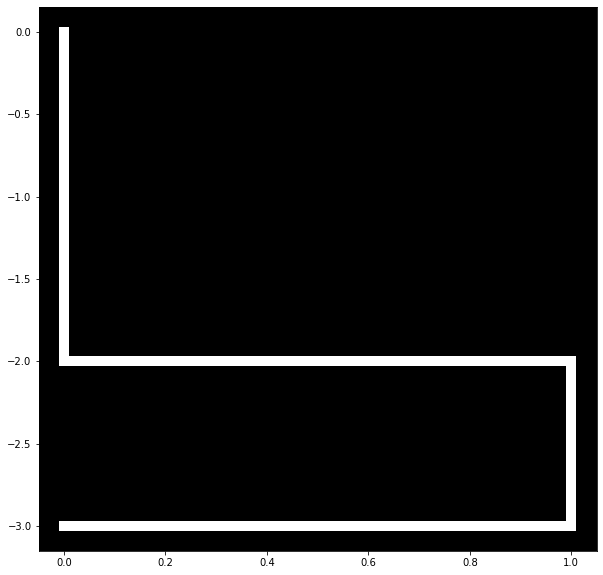

In [9]:
show_pat(vec2graph(leg))

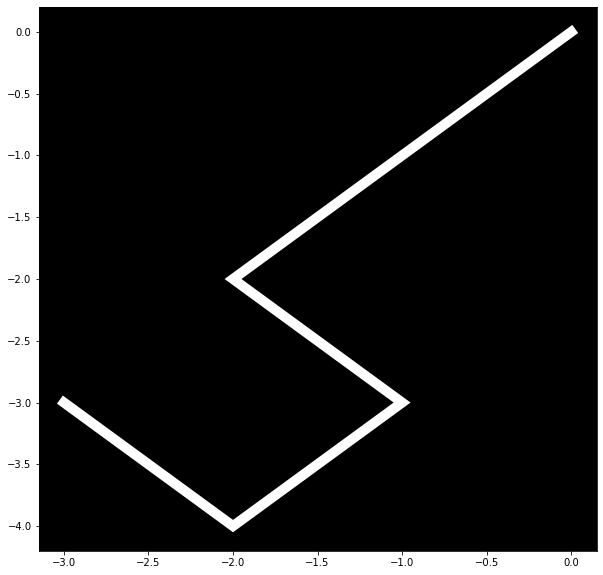

In [10]:
show_pat(vec2graph(leg2))

In [11]:
#plt.scatter(leg[:,0], leg[:,1])
#plt.show()